In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [48]:
# Arsitektur model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 5 kelas produk
])

In [4]:
# Kompilasi model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Generator data
train_generator = train_datagen.flow_from_directory(
    'D:/Haidar/Tugas/Semester 6/AIDS/UTS/images',
    target_size=(168, 168),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    'D:/Haidar/Tugas/Semester 6/AIDS/UTS/images',
    target_size=(168, 168),
    batch_size=32,
    class_mode='categorical'
)

# Memanggil nama kelas dari generator data
class_names = list(train_generator.class_indices.keys())
print("Nama kelas:", class_names)

Found 20 images belonging to 4 classes.
Found 20 images belonging to 4 classes.
Nama kelas: ['anting', 'cincin', 'gelang', 'kalung']


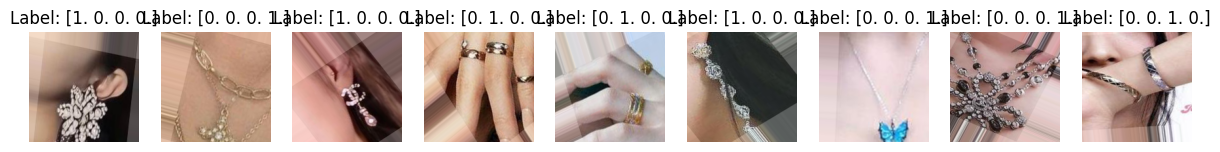

In [41]:
import matplotlib.pyplot as plt

# Memanggil beberapa contoh data pelatihan
for images, labels in train_generator:
    # Menentukan jumlah gambar yang akan ditampilkan
    num_images = min(len(images), 9)  # Batas hingga 9 gambar untuk tampilan grid 3x3
    
    # Menentukan ukuran subplot
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    # Jika hanya ada satu gambar, ubah axes menjadi array
    if num_images == 1:
        axes = [axes]
    
    # Menampilkan gambar-gambar
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title('Label: ' + str(labels[i]))
        axes[i].axis('off')
    
    # Menampilkan plot
    plt.show()
    break  # Hentikan loop setelah menampilkan batch pertama


In [42]:
# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

# Evaluasi model
scores = model.evaluate(validation_generator)
print(f'Accuracy: {scores[1]*100}%')


C:\Users\thepi\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


C:\Users\thepi\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2500 - loss: 1.3999 - val_accuracy: 0.4000 - val_loss: 1.3607
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 1.4793 - val_accuracy: 0.3500 - val_loss: 1.8083
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4000 - loss: 2.1679 - val_accuracy: 0.2500 - val_loss: 1.4771
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3000 - loss: 1.8267 - val_accuracy: 0.2500 - val_loss: 1.3426
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 1.3700 - val_accuracy: 0.3000 - val_loss: 1.3613
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3000 - loss: 1.4064 - val_accuracy: 0.2500 - val_loss: 1.3635
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 1.3813 - val_accuracy: 0.2500 - val_loss: 1.3544
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 1.4107 - val_accuracy: 0.2500 - val_loss: 1.3501
Epoch 9/50
1/1 ━━━━━━━━━━

In [44]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_new_image(model, img_path, target_size=(168, 168)):
    """
    Fungsi untuk memprediksi gambar baru dengan model yang sudah dilatih.
    
    Parameters:
    - model: Model yang sudah dilatih.
    - img_path: Path ke gambar yang akan diprediksi.
    - target_size: Ukuran target untuk mengubah ukuran gambar. Default adalah (168, 168).
    
    Returns:
    - Prediksi kelas gambar.
    """
    # Load dan preprocess gambar
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array = img_array / 255.0  # Normalisasi gambar
    
    # Prediksi dengan model
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    
    return predicted_class, predictions


In [47]:
# Path ke gambar baru yang akan diprediksi
new_image_path = 'D:/Haidar/Tugas/Semester 6/AIDS/UTS/test/gelangtest.jpg'

# Panggil fungsi prediksi
predicted_class, predictions = predict_new_image(model, new_image_path)

# Mapping kelas prediksi ke label kelas
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print(f'Predicted Class: {predicted_class[0]}')
print(f'Predicted Label: {predicted_label}')
print(f'Predictions: {predictions}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Class: 2
Predicted Label: gelang
Predictions: [[0.08698817 0.3156909  0.5094836  0.08783741]]
